In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Desktop/cacao.csv')

In [2]:
#cleans BroadBeanOrigin
def findmode(p):
    n=0
    o=''
    for k in p:
        if(p.count(k)>n):
            n=p.count(k)
            o=k
    return o

def findbbo(a):
    b=[]
    for i,r in df.Company.iteritems():
        if r==a:
            if(not(pd.isnull(df.BroadBeanOrigin.loc[i])) and (len(df.BroadBeanOrigin.loc[i])>1)):
                b.append(df.BroadBeanOrigin.loc[i])
    l=gen
    if(b!=[]):
        l=findmode(b)
    return l




u=[]
for i,z in df.BroadBeanOrigin.iteritems():
    u.append(df.BroadBeanOrigin.loc[i])
gen=findmode(u)

d=0
bbo=[]
for index, row in df.BroadBeanOrigin.iteritems():
    a=[]
    if (pd.isnull(row) or len(row)==1):
        d=d+1
        r=df.Company.loc[index]
        c=findbbo(r)
        df.BroadBeanOrigin.loc[index]=c


C:\Users\Bagyasree Sudharsan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
#cleans BeanType
def findmode(p):
    n=0
    o=''
    for k in p:
        if(p.count(k)>n):
            n=p.count(k)
            o=k
    return o

def findbbo(a):
    b=[]
    for i,r in df.BroadBeanOrigin.iteritems():
        if r==a:
            if(not(pd.isnull(df.BeanType.loc[i])) and (len(df.BeanType.loc[i])>1)):
                b.append(df.BeanType.loc[i])
    l=gen
    if(b!=[]):
        l=findmode(b)
    return l




u=[]
for i,z in df.BeanType.iteritems():
    if(not(pd.isnull(df.BeanType.loc[index]))):
        u.append(df.BeanType.loc[i])
gen=findmode(u)

for index, row in df.BeanType.iteritems():
    a=[]
    if (pd.isnull(row) or len(row)==1):
        d=d+1
        r=df.BroadBeanOrigin.loc[index]
        c=findbbo(r)
        df.BeanType.loc[index]=c

C:\Users\Bagyasree Sudharsan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
#makes the values in CocoaPercent integers
for index,row in df.CocoaPercent.iteritems():
    c=int(row[0:2])
    df.CocoaPercent.loc[index]=c


C:\Users\Bagyasree Sudharsan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
#cleans CocoaPercent
med=df.CocoaPercent.median()
sd=2*(df.CocoaPercent.std())
val=df.CocoaPercent.mean()-sd
for i,r in df.CocoaPercent.iteritems():
        if(r<=val):
            df.CocoaPercent.loc[index]=med

53.66613982330322


C:\Users\Bagyasree Sudharsan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


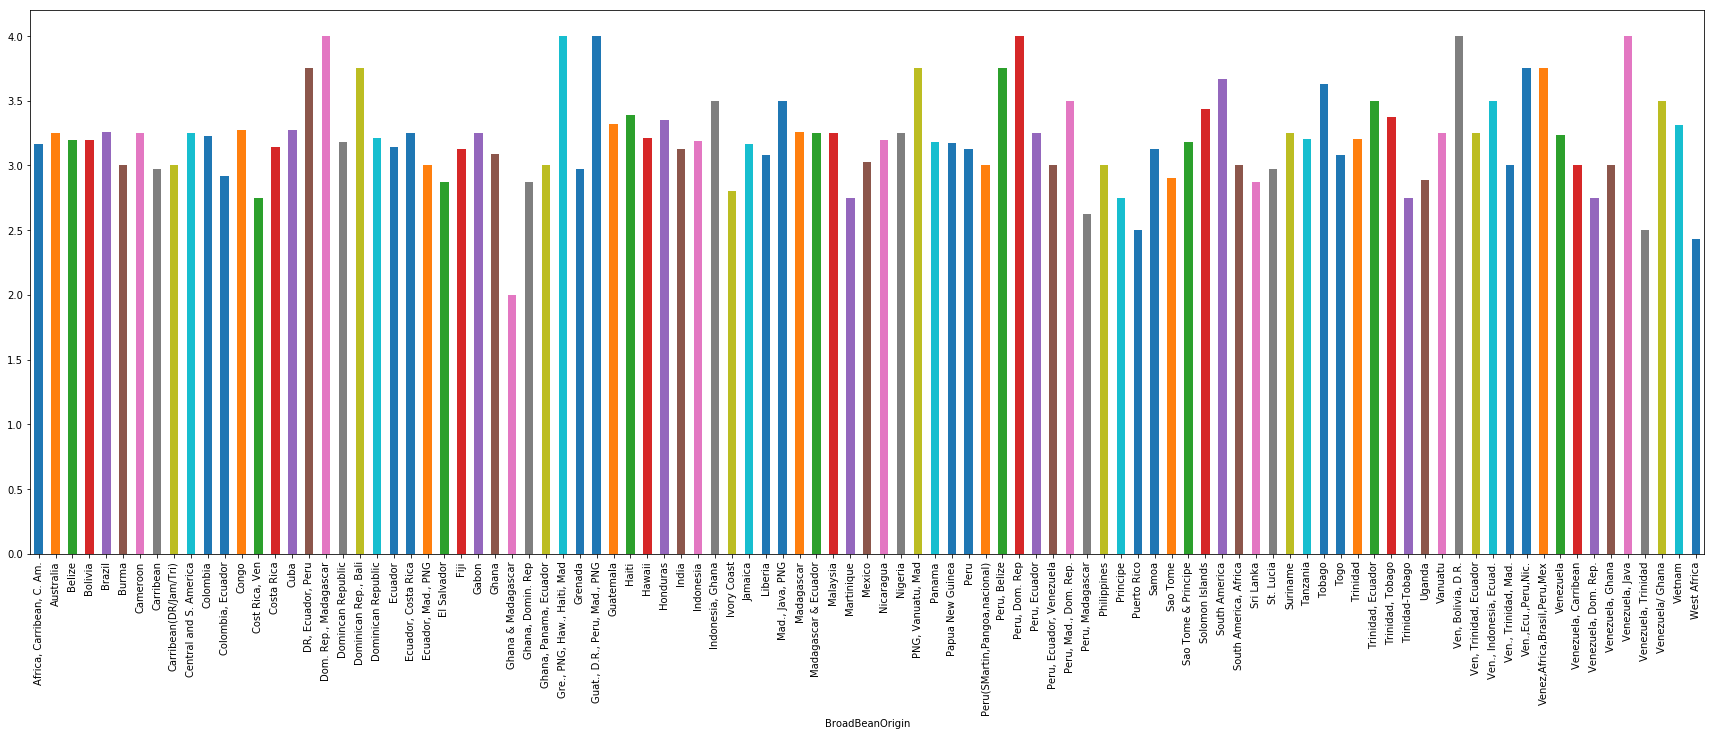

In [7]:
#BroadBeanOrigin vs Rating
plt.figure(figsize=(30,10))
df.groupby("BroadBeanOrigin")['Rating'].mean().plot(kind='bar')
plt.show()

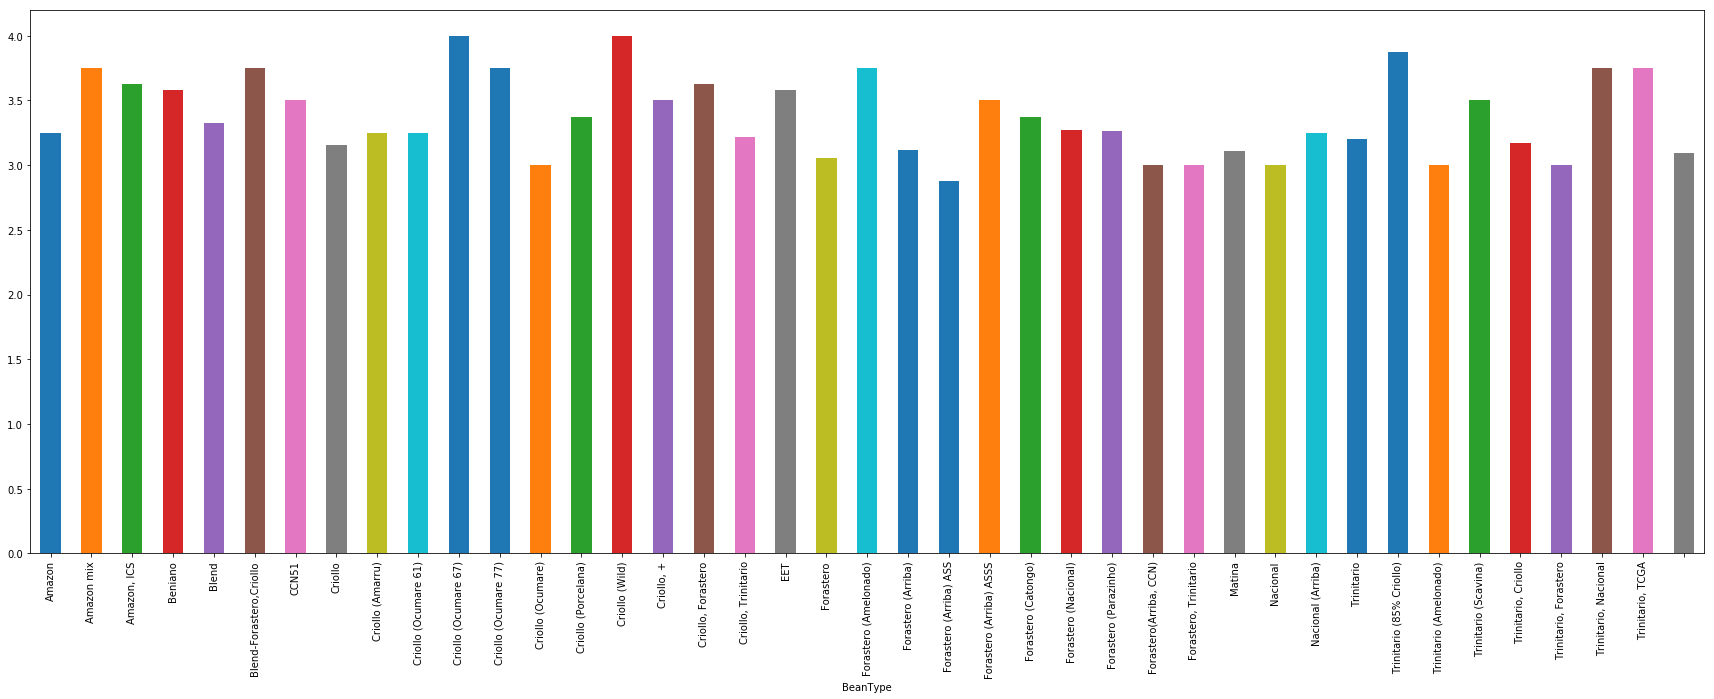

In [10]:
#BeanType vs Rating
plt.figure(figsize=(30,10))
df.groupby("BeanType")['Rating'].mean().plot(kind='bar')
plt.show()


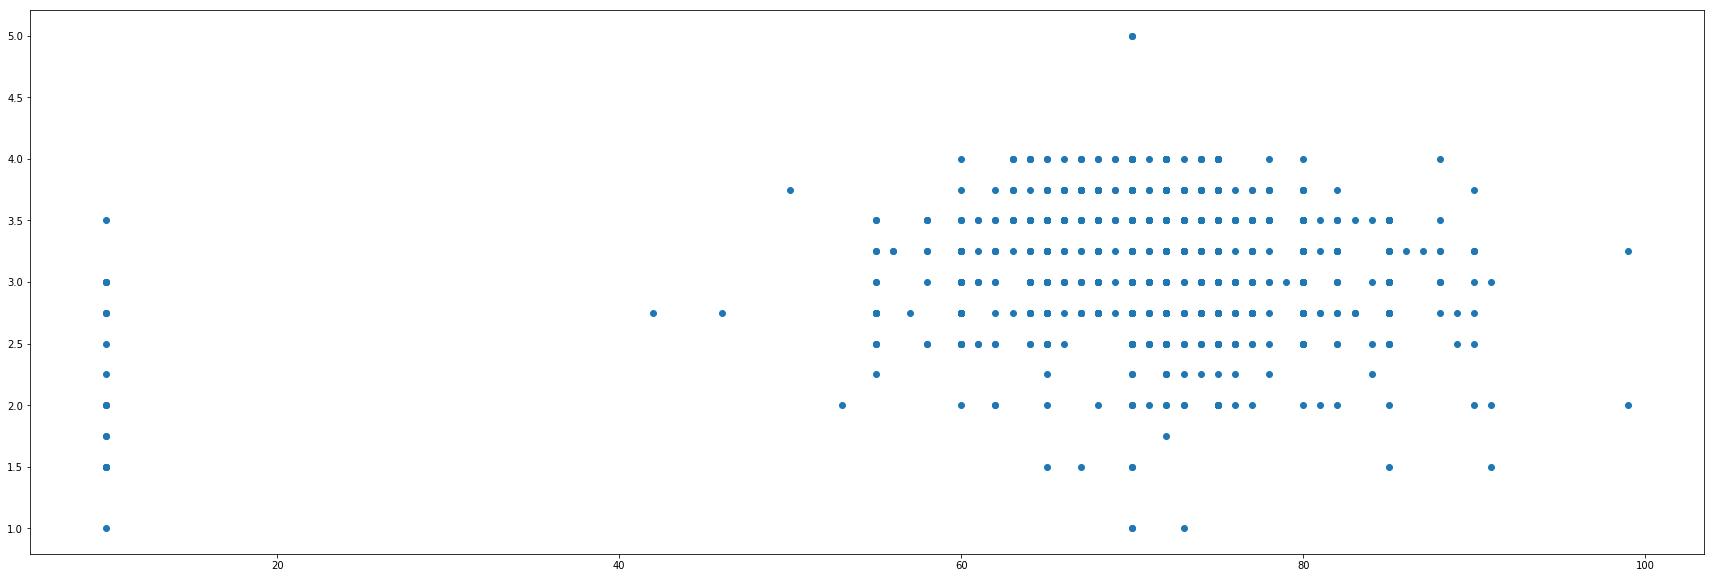

In [11]:
#CocoaPercent vs Rating
plt.figure(figsize=(30,10))
plt.scatter(df.CocoaPercent,df.Rating)
plt.show()

In [12]:
#finds the highest rated company
r=0
c=''
for index, row in df.Company.iteritems():
    if(df.Rating.loc[index]>r):
        r=df.Rating.loc[index]
        c=row
print(c)

Amedei


In [13]:
#finds the characteristics of the chocolate made by Amedei 
r=[]
bt=[]
bbo=[]
cp=[]
cl=[]
for index, row in df.Company.iteritems():
    if(row=='Amedei'):
        r.append(df.Rating.loc[index])
        cp.append(df.CocoaPercent.loc[index])
        bt.append(df.BeanType.loc[index])
        bbo.append(df.BroadBeanOrigin.loc[index])
        cl.append(df.CompanyLocation.loc[index])
print("rating:",sum(r)/len(r))
print("cp:",sum(cp)/len(cp))
print("bbo:",findmode(bbo))
print("cl:",findmode(cl))
print("bt:",findmode(bt))
        
        


rating: 3.8461538461538463
cp: 69.53846153846153
bbo: Venezuela
cl: Italy
bt: Trinitario


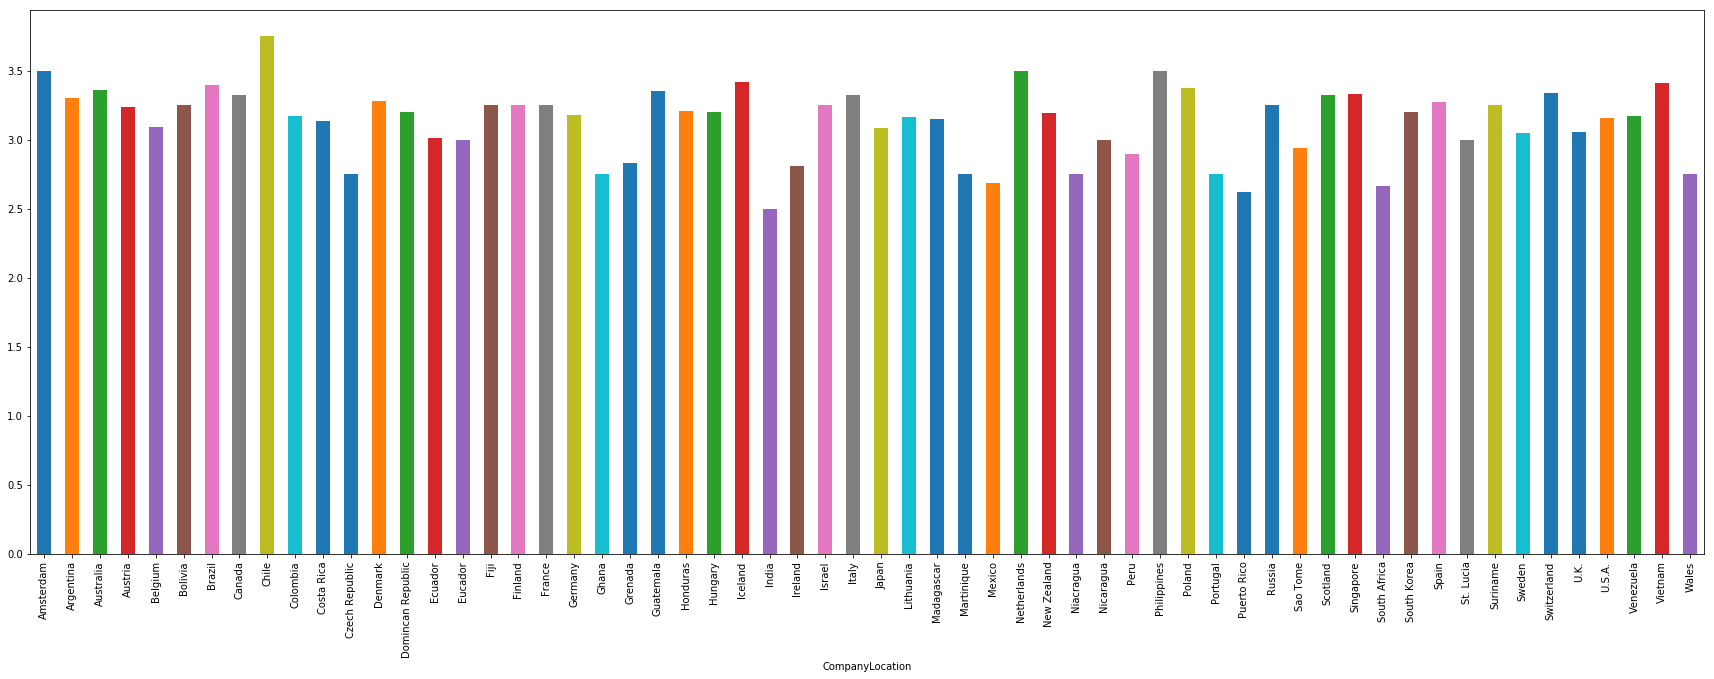

In [14]:
#CompanyLocation vs Rating
plt.figure(figsize=(30,10))
df.groupby("CompanyLocation")['Rating'].mean().plot(kind='bar')
plt.show()

In [15]:
#finds the characteristics of chocolate made in Peru
a=[]
b=[]
c=[]
for index,row in df.CompanyLocation.iteritems():
    if(row=="Chile"):
        a.append(df.BeanType.loc[index])
        b.append(df.BroadBeanOrigin.loc[index])
        c.append(df.CocoaPercent.loc[index])
print(findmode(a))
print(findmode(b))
print(sum(c)/len(c))

Criollo
Peru
70.0


In [16]:
#finds the most frequent company location used
a=[]
for index, row in df.CompanyLocation.iteritems():
    a.append(row)
findmode(a)

'U.S.A.'

In [17]:
#finds the average rating for each company location
print(df.groupby('CompanyLocation').Rating.mean())

CompanyLocation
Amsterdam            3.500000
Argentina            3.305556
Australia            3.357143
Austria              3.240385
Belgium              3.093750
Bolivia              3.250000
Brazil               3.397059
Canada               3.324000
Chile                3.750000
Colombia             3.173913
Costa Rica           3.138889
Czech Republic       2.750000
Denmark              3.283333
Domincan Republic    3.200000
Ecuador              3.009259
Eucador              3.000000
Fiji                 3.250000
Finland              3.250000
France               3.251603
Germany              3.178571
Ghana                2.750000
Grenada              2.833333
Guatemala            3.350000
Honduras             3.208333
Hungary              3.204545
Iceland              3.416667
India                2.500000
Ireland              2.812500
Israel               3.250000
Italy                3.325397
Japan                3.088235
Lithuania            3.166667
Madagascar           3.1